# Machine Learning

tipe pembuatan program yang lebih otomatis, dibandingkan program klasik dimana setiap langkah progam perlu kita code sendiri

## Terminologi

- Model
- Fitur
- Target

## Tipe Machine Learning

1. Supervised
2. Unsupervised
3. Semi-supervised
4. Reinforced
   ...

## Supervised

tipe machine learning dimana kita memilih:

- input (fitur)
- algoritma (tipe machine learning)
- output (target)

contohnya: model prediksi harga rumah, input nya luas dan postal code rumah, outputnya harga rumah, algoritma kita pilih...

Algoritma machine learning ada banyak dan kita pilih, cocok2an dari bentuk data kita. Selain memilih algoritma, kita juga perlu:

- testing akurasi model
- menerapkan teknik2 tambahan lainnya untuk membuat model lebih akurat

\*Boleh refer ke Machine Learning Overview untuk langkah2 pembuatan model Machine Learning

Dua jenis Supervised Machine Learning:

1. Regression
2. Classification

--> target selalu angka, fitur juga selalu angka, algoritma ML kita cuma bisa terima, proses, dan menghasilkan angka.


## Regression

- target tipe continuous
  untuk data tipe continuous, misalnya harga rumah

## Classification

- target nya tipe discrete kategori

untuk data tipe kategorikal, misalnya kira2 orang ini punya diabetes/tidak (yes/no), atau gambar ini gambar apa? (binatang/ tumbuhan/ lain2)


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error

from sklearn.model_selection import train_test_split

In [69]:
df_pizza = pd.read_csv("dataset/PizzaFranchise.csv", delimiter=";")

In [70]:
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   annual franchise fee  36 non-null     int64
 1   start up cost         36 non-null     int64
dtypes: int64(2)
memory usage: 708.0 bytes


In [71]:
df_pizza.head()

,annual franchise fee,start up cost
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


Misalnya, di contoh data ini, kita punya fitur "Annual Franchise Fee" dan kita punya target "Startup Cost"

kita bisa membuat model untuk prediksi "Startup Cost" saat kita tau "Annual Franchise Fee" nya berapa.


In [72]:
fitur = df_pizza[['annual franchise fee']]
target = df_pizza['start up cost']

X = fitur
y = target

In [73]:
# buat model
model_pizza_lr = LinearRegression()


# latih model
model_pizza_lr.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
# membuat prediksi menggunakan model
model_pizza_lr.predict([[1000]])

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1240.76215819])

model kita memprediksi kalau "Startup Cost" adalah 1240.76 saat kita punya input/fitur/"annual franchise fee" adalah 1000


<Axes: xlabel='annual franchise fee', ylabel='start up cost'>

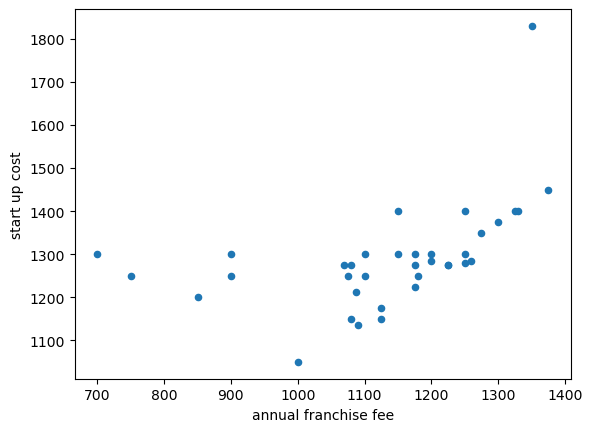

In [75]:
# optional, visualisasi
# hanya saat fitur 1, target 1, kita bisa plot ke 2 dimensi

df_pizza.plot(kind="scatter", x="annual franchise fee", y="start up cost")

In [76]:
# untuk setiap 100 dari 700-1400 kita minta value startup cost dari mdoel kita
sample_input = np.arange(700, 1401, 100).reshape(-1, 1)
print(sample_input)

hasil_prediksi1 = model_pizza_lr.predict(sample_input)
print(hasil_prediksi1)

[[ 700]
 [ 800]
 [ 900]
 [1000]
 [1100]
 [1200]
 [1300]
 [1400]]
[1128.81477741 1166.13057101 1203.4463646  1240.76215819 1278.07795178
 1315.39374538 1352.70953897 1390.02533256]


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


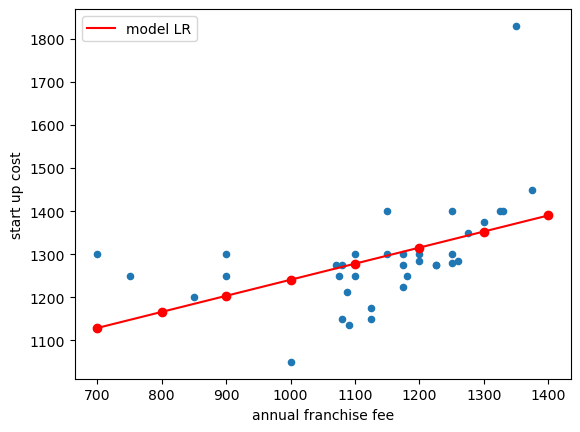

In [77]:

# data awal
df_pizza.plot(kind="scatter", x="annual franchise fee", y="start up cost")

# data hasil prediksi model kita
plt.scatter(sample_input, hasil_prediksi1, color="red")
plt.plot(sample_input, hasil_prediksi1, color="red", label="model LR")

plt.legend()

plt.show()

teknik Linear Regression hanya cocok kalau variabel kita punya korelasi yang lurus (linear)

kita bisa tambahkan `Polynomial Features` ke model ini untuk membuat model regression dengan formula tipe polynomial, dimana garisnya tidak harus lurus, bisa belok.


In [78]:
# secara programming, kita ubah data fitur kita jadi ada versi polynomialnya
# baru kita masukkan lagi ke model ML nya untuk dilatih

poly = PolynomialFeatures(degree=2)

# fitur_poly
X_poly = poly.fit_transform(X)

# target tidak usah diubah

# kita latih lagi model kita
model_pizza_lr2 = LinearRegression()
model_pizza_lr2.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


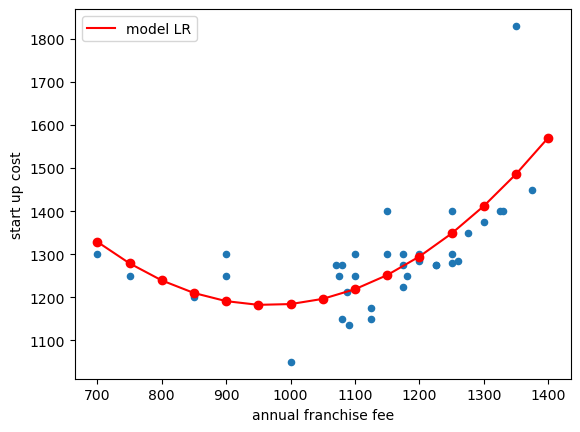

In [79]:
# visualisai hasil garis buatan modelnya

# data awal
df_pizza.plot(kind="scatter", x="annual franchise fee", y="start up cost")

# data hasil prediksi model kita
sample_input = np.arange(700, 1401, 50).reshape(-1, 1)
sample_input_poly = poly.fit_transform(sample_input)

hasil_prediksi2 = model_pizza_lr2.predict(sample_input_poly)

# saat di plot kita gunakan versi bukan polynomialnya karena aslinya fitur kita cuma 1
plt.scatter(sample_input, hasil_prediksi2, color="red")
plt.plot(sample_input, hasil_prediksi2, color="red", label="model LR")

plt.legend()

plt.show()

Saat kita tidak bisa membuat visual untuk model machine learning nya, kita hanya bisa gunakan angka2 untuk mengetahui modelnya seberapa akurat. di Regression umumyna kita pakai Mean Squared Error


In [80]:
hasil_prediksi1 = model_pizza_lr.predict(x)
len(hasil_prediksi1)

36

In [81]:
hasil_prediksi2 = model_pizza_lr2.predict(x_poly)
len(hasil_prediksi2)

36

In [82]:
# cek rmse untuk kedua model kita
print("LR RMSE:", root_mean_squared_error(y, hasil_prediksi1))

print("Polynomial Regression d2 RMSE:",
      root_mean_squared_error(y, hasil_prediksi2))

LR RMSE: 107.50949652541526
Polynomial Regression d2 RMSE: 83.89961365269852


kalau dari angka Error nya, sepertinya model kedua kita, polynomial regression, lebih akurat.

Tapi tau darimana ini overfitting atau tidak? kita gunakan test tambahan:

- data split: train data dan test data
- dari hasil prediksi, kita test error rate train data dan test data berapa

- kalau angka error nya mirip2 berarti model kita harusnya ok
- kalau angka error nya berbeda, jauh, berarti model kita lebih ke menghapal data latihan, overfit, dan tidak bisa memprediksi dengan baik


In [83]:
# kita mundur ke sebelum kita latih model, kita split data awal menjadi dua set: train dan test set

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [87]:
print(X.shape, "data awal")
print(X_train.shape, "data training")
print(X_test.shape, "data testing")

(36, 1) data awal
(27, 1) data training
(9, 1) data testing


In [88]:
print(y.shape, "data awal")
print(y_train.shape, "data training")
print(y_test.shape, "data testing")

(36,) data awal
(27,) data training
(9,) data testing


kita gunakan data training untuk latih model

lalu kita gunakan data testing untuk cek error rate modelnya, data training juga kita gunakan untuk cek error rate model nya jadi kita punya pembdanding dengan hasil dari data testing


In [90]:
poly = PolynomialFeatures(degree=3)

# data training, kita ubah jadi versi polynomial
X_train_poly = poly.fit_transform(X_train)

# latih model
model_pizza_lr3 = LinearRegression()
model_pizza_lr3.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [91]:
# cek error rate
# data training
hasil_pred_train = model_pizza_lr3.predict(X_train_poly)
root_mean_squared_error(y_train, hasil_pred_train)

79.35871378724985

In [92]:
# cek error rate
# data test
X_test_poly = poly.fit_transform(X_test)
hasil_pred_train = model_pizza_lr3.predict(X_test_poly)
root_mean_squared_error(y_test, hasil_pred_train)

111.23582957904459

disini sebagai data scientist nya kita yang perlu membuat decision, apakah model ini akurat? apakah overfit? apakah underfit?

error rate saat menggunakan data training lebih rendah dibanding error rate data testing, ini ada indikasi overfitting. tapi kalau bedanya cuma sedikit, apakah ini kebetulan?


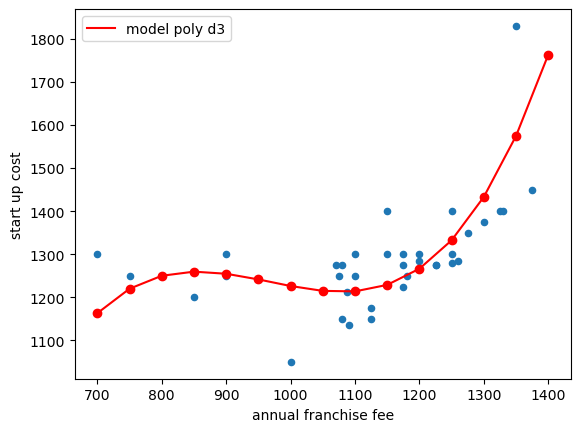

In [93]:
# visualisai hasil garis buatan modelnya

# data awal
df_pizza.plot(kind="scatter", x="annual franchise fee", y="start up cost")

# data hasil prediksi model kita
sample_input = np.arange(700, 1401, 50).reshape(-1, 1)
sample_input_poly = poly.fit_transform(sample_input)

hasil_prediksi3 = model_pizza_lr3.predict(sample_input_poly)

# saat di plot kita gunakan versi bukan polynomialnya karena aslinya fitur kita cuma 1
plt.scatter(sample_input, hasil_prediksi3, color="red")
plt.plot(sample_input, hasil_prediksi3, color="red", label="model poly d3")

plt.legend()

plt.show()